# Kaggle Titanics Dataset EDA - Further Analysis & Visualization

**Author:** Haya Yasser<br>
**Exploratory analysis of Titanic dataset using Python and Pandas**<br>
**Oct 2025**

## Import Libraries

In [26]:
import os
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Titanics Dataset via Kaggle API

**Note:** use <code>!pip install kaggle </code> to install kaggle if not already installed

In [9]:
# Creating the hidden .kaggle folder in home directory
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

In [11]:
# Managing permissions
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
# Downloading dataset
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
# Unzipping dataset folder
!unzip titanic.zip -d .

Archive:  titanic.zip
  inflating: ./gender_submission.csv  
  inflating: ./test.csv              
  inflating: ./train.csv             


In [8]:
# Reading the train.csv file into a DataFrame
df = pd.read_csv("train.csv", index_col=0)

In [10]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analyze the Data

In [54]:
# Calculating the average passenger survival rate by sex
df.groupby('Sex').Survived.mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

**Finding:** 74% of females survived while only 18% of males did

In [56]:
# Calculating the average passenger survival rate by passenger class
df.groupby('Pclass').Survived.mean() * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

**Finding:** 62% of first class passengers survived while 47% of second class passengers and 24% of third class passengers did. 

In [58]:
# Calculating the average passenger survival rate by both sex and passenger class
df.groupby(['Sex', 'Pclass']).Survived.mean() * 100

Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
Name: Survived, dtype: float64

**Finding:** Across both sexes, a larger percentage of first class passengers survived in comparison to second/third class passengers - 96% of first class female passengers survived and 36% of first class male passengers survived.

In [50]:
# Top 5 passengers who paid the highest fares
df.loc[:, ['Name', 'Pclass', 'Fare']].sort_values(by='Fare', ascending=False).head()

,Name,Pclass,Fare
PassengerId,,,
259,"Ward, Miss. Anna",1,512.3292
738,"Lesurer, Mr. Gustave J",1,512.3292
680,"Cardeza, Mr. Thomas Drake Martinez",1,512.3292
89,"Fortune, Miss. Mabel Helen",1,263.0000
28,"Fortune, Mr. Charles Alexander",1,263.0000


**Finding:** Top 5 paying passengers were all first class passengers

## Visualize the Data

<Axes: title={'center': 'Passenger Age Distribution'}, xlabel='Age', ylabel='Count'>

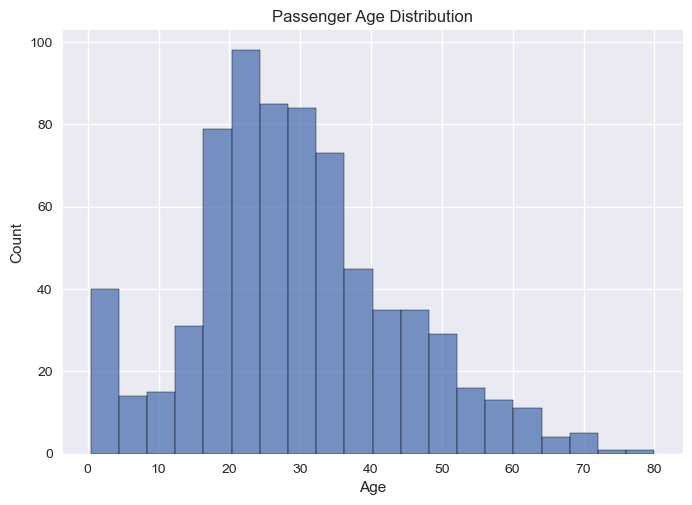

In [42]:
plt.style.use('seaborn-v0_8')

# Plotting a histogram of age distribution of passengers
plt.title("Passenger Age Distribution")
sns.histplot(data=df['Age'])

**Finding:** Most passengers fall in late teens to early 30s age range.

<Axes: title={'center': 'Survival Rate, by Gender'}, xlabel='Sex', ylabel='Survived'>

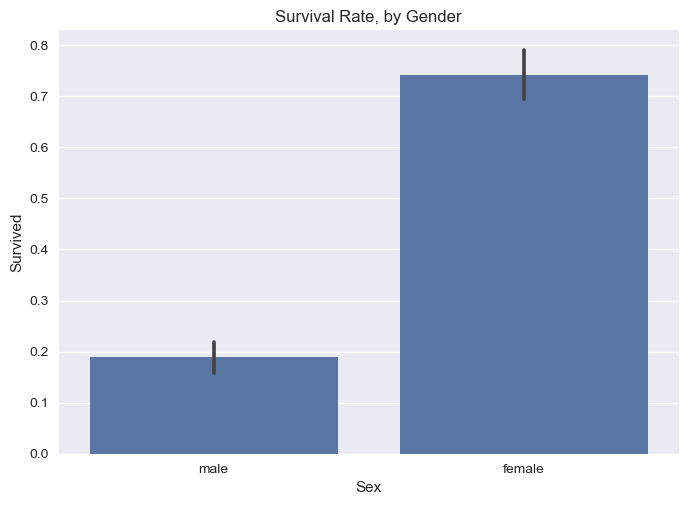

In [44]:
# Plotting a bar chart indicating survival rate by gender

plt.title("Survival Rate, by Gender")
sns.barplot(x=df['Sex'], y=df['Survived'])

**Finding:** Females had a much higher survival rate than males

<Axes: title={'center': 'Survival Rate, by Passenger Class'}, xlabel='Pclass', ylabel='Survived'>

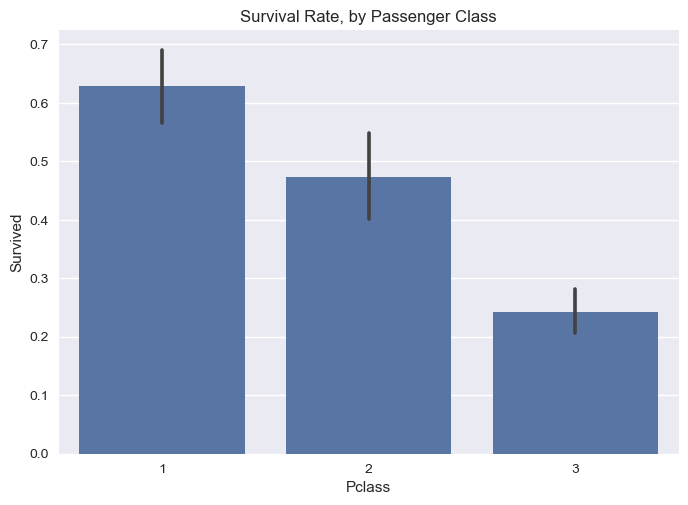

In [46]:
# Plotting a bar chart indicating survival rate by sex

plt.title("Survival Rate, by Passenger Class")
sns.barplot(x=df['Pclass'], y=df['Survived'])

**Finding:** First class passengers had a higher survival rate than second class passengers who had a higher survival rate than third class passengers.

<Axes: title={'center': 'Relationship between Passenger Age, Passenger Fare, and Survival'}, xlabel='Age', ylabel='Fare'>

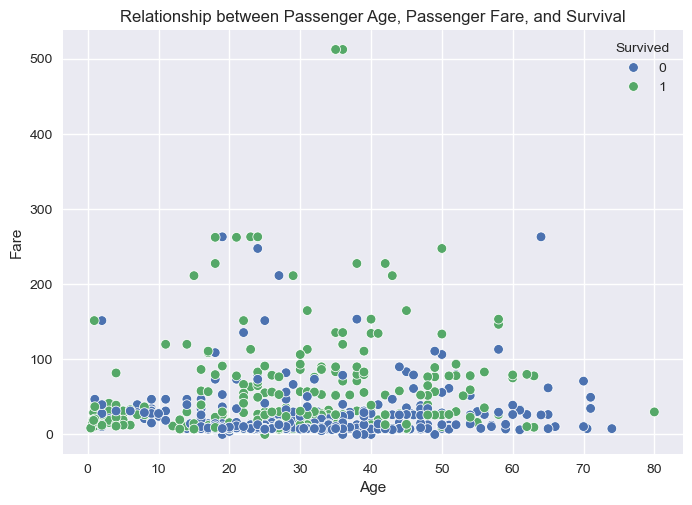

In [48]:
# Scatter plot: Age vs Fare vs Survival

plt.title("Relationship between Passenger Age, Passenger Fare, and Survival")
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['Survived'])

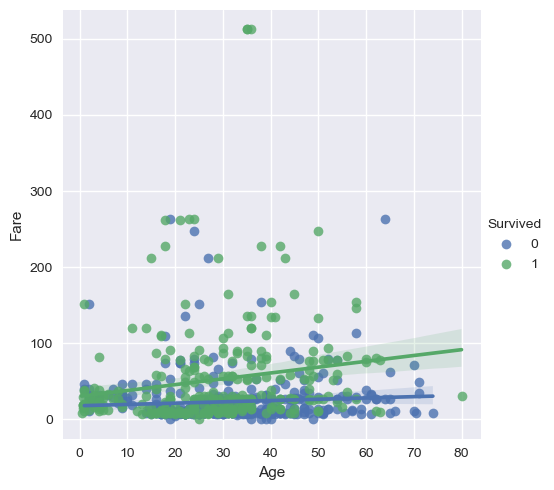

In [52]:
# Adding regression lines

sns.lmplot(x='Age', y='Fare', hue='Survived', data=df)

**Finding:** Slight positive correlation for older passengers and higher fare (notably for surviving passengers)

## Final Insights

Based on this EDA of the Titanics Dataset, we come to the following conclusions:
- More **females** survived in comparison to **men**. This makes sense due to the historical evidence that **women and children were prioritized during saving efforts**.
- There was also clear distinction in which passengers' lives were deemed more 'valuable' during the sinking of the ship. **First class passengers** had a survival rate of **60%** in comparison to **second (47%)** and **third (24%)** class passengers. This was evident **across both sexes**. This indicates an obvious *segregation by social class, historically apparent during the early 1900s*.
- Most passengers fell into the following age range: **late teens to mid 30s**
- In terms of **surviving passengers**, there was a *slight positive correlation* indicating that **older passengers were willing to pay a higher fare**. Otherwise, there was **no real correlation** tying *non-surviving passengers' ages to the fare they paid*.